<a href="https://colab.research.google.com/github/devdebdeb/ML-Classificacao/blob/main/Classifica%C3%A7%C3%A3o_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.pipeline import Pipeline
import joblib

## Data1

In [ ]:
#Dados área médica
url = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/doenca_cardiaca.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['Doenca cardiaca'] = df['Doenca cardiaca'].map({'Presenca': 1, 'Ausencia': 0})

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Data2

In [ ]:
url2 ='https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Atividades/water_potability.csv'

In [ ]:
df2 = pd.read_csv(url2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df2.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
df2.dropna(inplace=True)

In [ ]:
X = df2.drop('Potability', axis=1)
y = df2['Potability']

## Explorando data

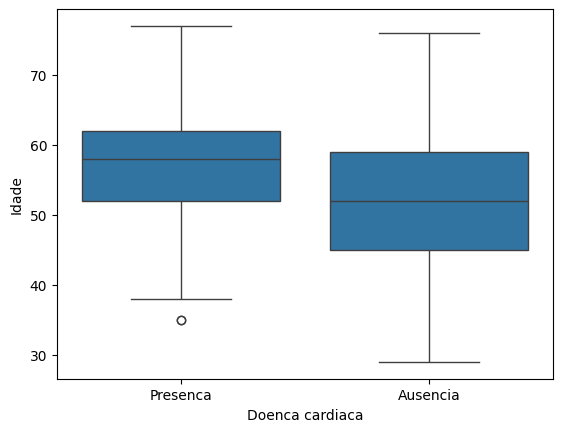

In [ ]:
sns.boxplot(x='Doenca cardiaca', y='Idade', data=df);

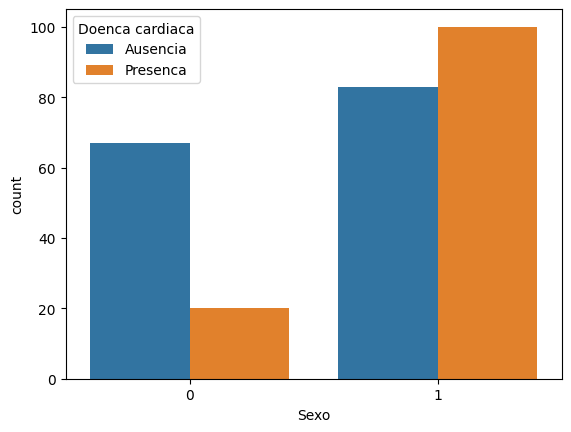

In [ ]:
sns.countplot(x='Sexo', hue ='Doenca cardiaca', data=df);

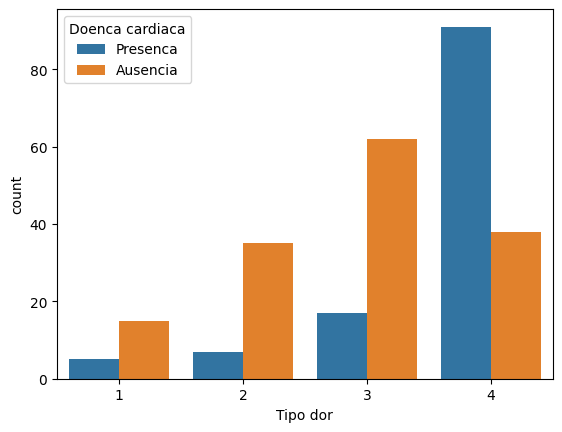

In [ ]:
sns.countplot(x='Tipo dor', hue='Doenca cardiaca', data=df);

In [ ]:
df['Doenca cardiaca'].value_counts()

,count
Doenca cardiaca,
Ausencia,150
Presenca,120


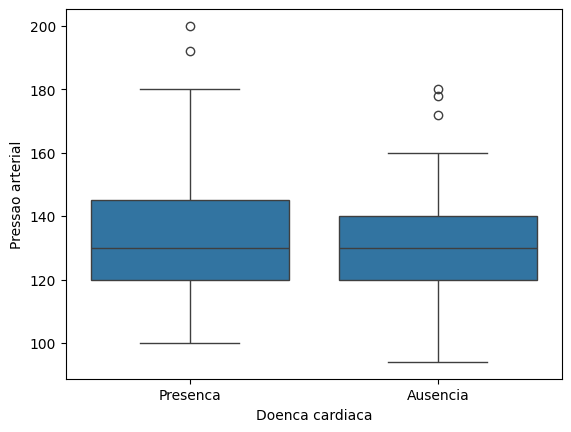

In [ ]:
sns.boxplot(x='Doenca cardiaca', y='Pressao arterial', data=df);

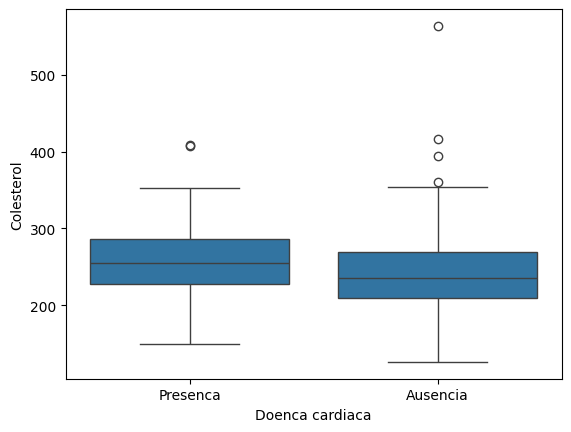

In [ ]:
sns.boxplot(x='Doenca cardiaca', y='Colesterol', data=df);

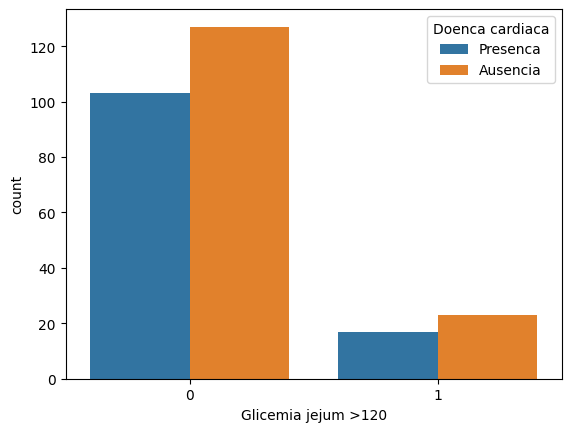

In [ ]:
sns.countplot(x='Glicemia jejum >120', hue='Doenca cardiaca', data=df);

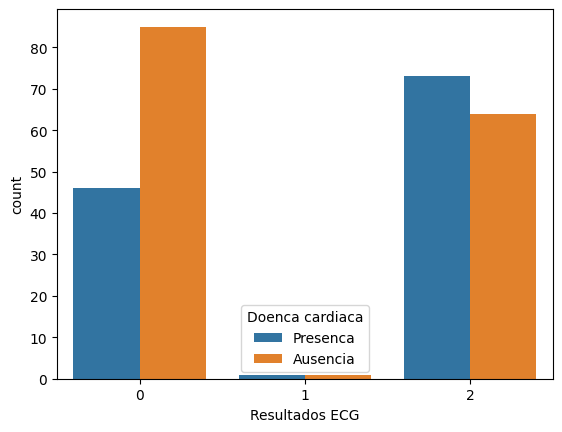

In [ ]:
 sns.countplot(x='Resultados ECG', hue='Doenca cardiaca', data=df);

# Iniciando Clasificação

##sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7962962962962963

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.74      0.83      0.78        24

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54



##xgboost.XGBClassifier

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic')
xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8148148148148148

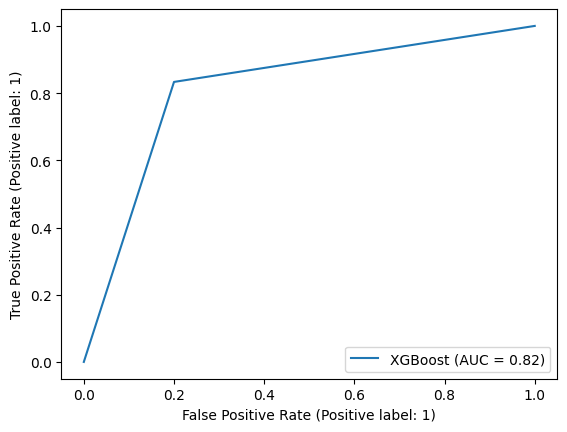

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred, name='XGBoost');

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



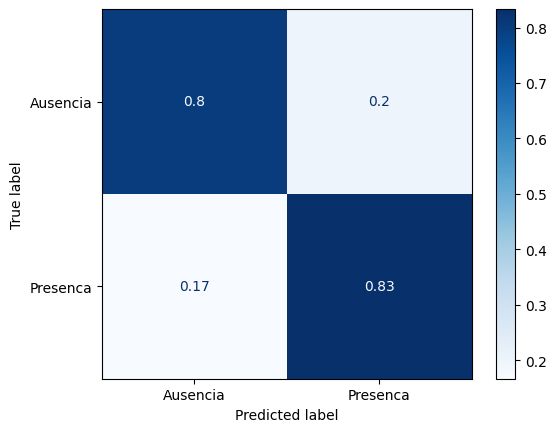

In [ ]:
ConfusionMatrixDisplay.from_estimator(xg_cl, X_test, y_test, display_labels=['Ausencia', 'Presenca'], normalize='true', cmap='Blues');

# CV

In [ ]:
dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
params = {
    'objective': 'binary:logistic'
}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=5, metrics='error',
                    as_pandas=True, seed=123)

In [ ]:
print(cv_results)

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.138889         0.023570         0.288889        0.055184
1          0.081481         0.010476         0.262963        0.010476
2          0.068519         0.013858         0.248148        0.037771
3          0.050000         0.007857         0.229630        0.010476
4          0.046296         0.010476         0.222222        0.018144


## Early Stopping

In [ ]:
params = {
    'objective': 'binary:logistic'
}
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    nfold=3,
                    num_boost_round=100,
                    early_stopping_rounds=5,
                    metrics='error',
                    as_pandas=True, seed=123)

print(cv_results)
acc = 1-cv_results['test-error-mean'].iloc[-1]
print(f"Acurácia: {acc}")

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.138889         0.023570         0.288889        0.055184
1          0.081481         0.010476         0.262963        0.010476
2          0.068519         0.013858         0.248148        0.037771
3          0.050000         0.007857         0.229630        0.010476
4          0.046296         0.010476         0.222222        0.018144
5          0.033333         0.013608         0.214815        0.013858
6          0.024074         0.006929         0.207407        0.013858
Acurácia: 0.7925925925925926


# Ajustando hiper-parâmetros

In [ ]:
params = {'objective':'binary:logistic', 'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5}

cv_resultados = xgb.cv(dtrain=dmatrix,
                       params=params,
                       nfold=3,
                       num_boost_round=100,
                       metrics='error',
                       as_pandas=True,
                       seed=123)

print(cv_resultados)
acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia}')

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.353704         0.103869         0.451852        0.066872
1           0.275926         0.088114         0.385185        0.112705
2           0.214815         0.059892         0.333333        0.083148
3           0.185185         0.059201         0.270370        0.040909
4           0.183333         0.036004         0.274074        0.044752
..               ...              ...              ...             ...
95          0.011111         0.004536         0.207407        0.005238
96          0.011111         0.004536         0.203704        0.005238
97          0.011111         0.004536         0.203704        0.005238
98          0.011111         0.004536         0.200000        0.009072
99          0.011111         0.004536         0.203704        0.005238

[100 rows x 4 columns]
Acuracia: 0.7962962962962963


In [ ]:
params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 10],
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [10, 25, 50],
}

mod_xgb = xgb.XGBClassifier()

random_search_cv = RandomizedSearchCV(estimator=mod_xgb,
                                      param_distributions=params,
                                      n_iter=5,
                                      cv=4,
                                      scoring='accuracy',
                                      verbose=1
)

In [ ]:
random_search_cv.fit(X, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [0, 2, 4, 6, 10],
                                        'n_estimators': [10, 25, 50]},
                   scoring='accuracy', verbose=1)

In [ ]:
random_search_cv.best_params_

{'n_estimators': 10,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
random_search_cv.best_score_

0.8446005267778753

## GridSearchCV

In [ ]:
params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 10],
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [10, 25, 50],
}

mod_xgb = xgb.XGBClassifier()

grid_search_cv = GridSearchCV(estimator=mod_xgb,
                                      param_grid=params,
                                      cv=4,
                                      scoring='accuracy',
                                      verbose=1
)

In [ ]:
grid_search_cv.fit(X, y)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 2, 4, 6, 10],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 0,
 'n_estimators': 10}

In [ ]:
grid_search_cv.best_score_

0.8446005267778753

In [ ]:
mod_xgb_ajusted = xgb.XGBClassifier(objective='binary:logistic',
                                colsample_bytree=1,
                                learning_rate=0.1,
                                max_depth=2,
                                n_estimators=50
                                )

mod_xgb_ajusted.fit(X_train, y_train)
y_pred = mod_xgb_ajusted.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8518518518518519

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



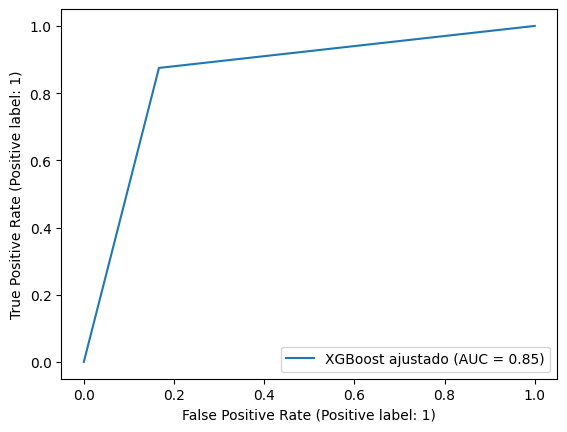

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred, name='XGBoost ajustado');

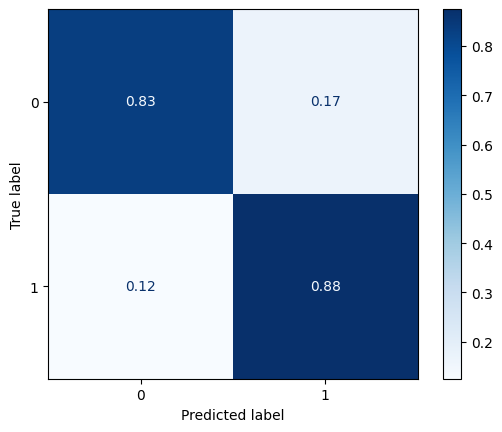

In [ ]:
ConfusionMatrixDisplay.from_estimator(mod_xgb_ajusted, X_test, y_test, normalize='true', cmap='Blues');

# XGBoost - Pipelines

In [ ]:
pipeline = Pipeline([('xgboost', xgb.XGBClassifier())])

xgb_param_grid = {
    'xgboost__learning_rate':[0.1,0.2,0.3],
    'xgboost__max_depth':[0,2,4,6,10],
    'xgboost__colsample_bytree':[0.1,0.5,1],
    'xgboost__n_estimators':[10,25,50]
}

grid_search_cv = GridSearchCV(estimator=pipeline,
                              param_grid=xgb_param_grid,
                              scoring='accuracy',
                              cv=4,
                              verbose=1)

grid_search_cv.fit(X, y)

print(f"Acurácia: {grid_search_cv.best_score_}")
print(f"Melhor estimador: {grid_search_cv.best_estimator_}")

Fitting 4 folds for each of 135 candidates, totalling 540 fits
Acurácia: 0.8446005267778753
Melhor estimador: Pipeline(steps=[('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=0, max_leaves=None,
                               min_child_weight=None, missing=nan,
                   

In [ ]:
joblib.dump(grid_search_cv, 'modelo-pipeline.pkl')

['modelo-pipeline.pkl']

## Utilizando o modelo em dados novos

In [ ]:
url3 = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/pacientes_novos.csv'

In [ ]:
new_data = pd.read_csv(url3)

In [ ]:
new_data.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3


In [ ]:
mod_pkl = joblib.load('modelo-pipeline.pkl')

In [ ]:
y_pred = mod_pkl.predict(new_data)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

### PredictPROBA

In [ ]:
prob = mod_pkl.predict_proba(new_data)
prob

array([[0.5475481 , 0.45245188],
       [0.7613889 , 0.23861113],
       [0.7094722 , 0.29052785],
       [0.62776846, 0.37223154],
       [0.78665614, 0.21334384],
       [0.7329862 , 0.26701382],
       [0.33549488, 0.6645051 ],
       [0.7860813 , 0.2139187 ],
       [0.74801886, 0.2519811 ],
       [0.4931711 , 0.5068289 ]], dtype=float32)

In [ ]:
df_new_data = pd.DataFrame(new_data)
df_new_data['pred'] = y_pred

In [ ]:
df_new_data

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,pred
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7,0
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3,0
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3,0
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3,0
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3,0
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7,1
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3,0
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6,0
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3,1


# Using XGBoost on a different dataset, Challenge

In [ ]:
url4 = 'https://raw.githubusercontent.com/vqrca/heart_disease/main/Data/heart_2020_cleaned.csv'

In [ ]:
new_dataset = pd.read_csv(url4)

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
new_dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
new_dataset.isna().sum().sum()
#No NaN/null

0

In [ ]:
new_dataset.duplicated().sum()
new_dataset.drop_duplicates(inplace=True)
new_dataset.reset_index(drop=True, inplace=True)

### X, y

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Preprocess Data

### Single-Category Encoding

In [ ]:
## Yes/No Features

features = [
    'HeartDisease',
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Diabetic',
    'PhysicalActivity',
    'Asthma',
    'KidneyDisease',
    'SkinCancer',
]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le = LabelEncoder()

for feature in features:
    new_dataset[feature] = le.fit_transform(new_dataset[feature])

### Multiple-Category Encoding

In [ ]:
## Multiple categories
mu_cat = [
    'AgeCategory',
    'Race',
    'Diabetic',
    'GenHealth',
    'Sex'
]

In [ ]:
new_dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,2,0,Fair,6.0,1,0,0
301713,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
301714,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
301715,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [ ]:
categorical_df = new_dataset[mu_cat]
ohe = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(ohe.fit_transform(categorical_df).toarray(),
                          columns=ohe.get_feature_names_out(mu_cat))

df = pd.concat([new_dataset.drop(mu_cat, axis=1), df_encoded], axis=1)

## Balanceamento dos dados

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
0,274456
1,27261


### RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

## Instanciar modelo e avaliar métricas

### Modelo

In [ ]:
# Criar e treinar o modelo XGBoost
mod_xgb2 = xgb.XGBClassifier(objective='binary:logistic')
mod_xgb2.fit(X_resampled, y_resampled)
y_pred = mod_xgb2.predict(X_test)

In [ ]:
# Avaliar desempenho
class_report = classification_report(y_test, y_pred)

### Métricas

In [ ]:
print(f"Relatório de Classificação:\n{class_report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     82175
           1       0.22      0.78      0.34      8341

    accuracy                           0.73     90516
   macro avg       0.60      0.75      0.59     90516
weighted avg       0.90      0.73      0.78     90516



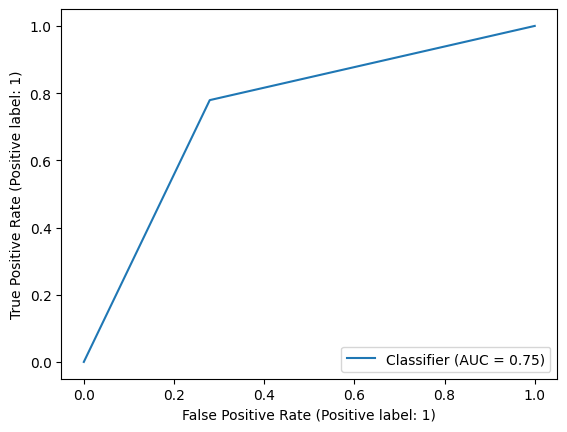

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred);

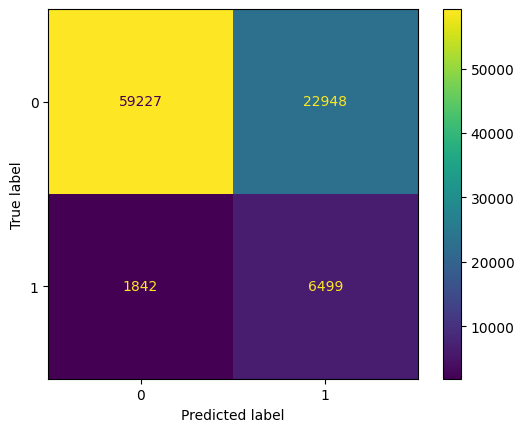

In [ ]:
ConfusionMatrixDisplay.from_estimator(mod_xgb2, X_test, y_test);

## Otimizar hiperparâmetros e analisar as métricas

### Otimização de hiper parâmetros

In [ ]:
params = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [0, 2, 4, 6, 10],
    'colsample_bytree': [0.1, 0.5, 1],
    'n_estimators': [10, 25, 50]
}

In [ ]:
mod_xgb3 = xgb.XGBClassifier()
random_search_cv = RandomizedSearchCV(estimator=mod_xgb3, param_distributions=params, n_iter=10,
                                      cv=5, scoring='accuracy', verbose=1)

In [ ]:
random_search_cv.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.1, 0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [0, 2, 4, 6, 10],
                                        'n_estimators': [10, 25, 50]},
                   scoring='accuracy', verbose=1)

### Métricas

In [ ]:
print('Melhores parametros encontrados: ', random_search_cv.best_params_)
print('Acuracia:', random_search_cv.best_score_)

Melhores parametros encontrados:  {'n_estimators': 25, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1}
Acuracia: 0.9113208735609183


## Reajustar modelo e avaliar novas métricas de classificação

### Modelo

In [ ]:
mod_xgb4 = xgb.XGBClassifier(n_estimators= 25, max_depth= 6, learning_rate= 0.2, colsample_bytree= 1)
mod_xgb4.fit(X_resampled, y_resampled)
y_pred = mod_xgb4.predict(X_test)

### Novas métricas

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     82175
           1       0.22      0.79      0.35      8341

    accuracy                           0.73     90516
   macro avg       0.60      0.75      0.59     90516
weighted avg       0.90      0.73      0.78     90516



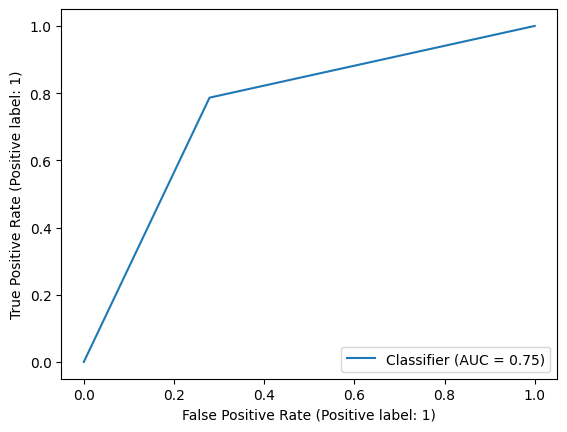

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred);

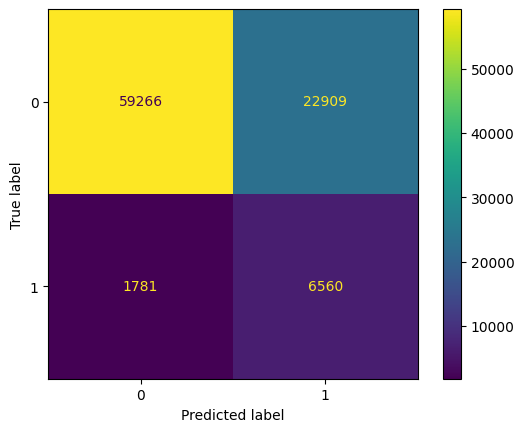

In [ ]:
ConfusionMatrixDisplay.from_estimator(mod_xgb4, X_test, y_test);

# Water potability

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
xg_agua = xgb.XGBClassifier(objective='binary:logistic')
xg_agua.fit(X_train, y_train)
y_pred = xg_agua.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6125827814569537

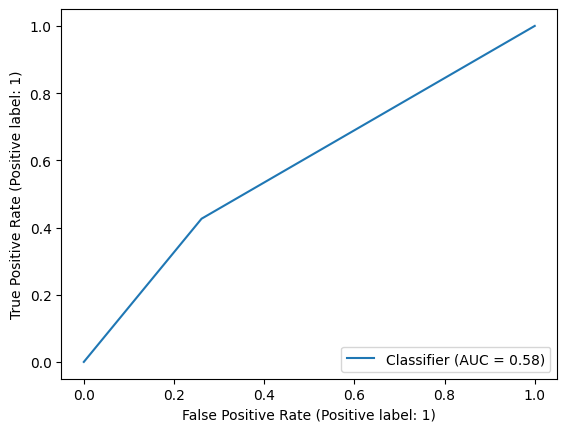

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.69       360
           1       0.53      0.43      0.47       244

    accuracy                           0.61       604
   macro avg       0.59      0.58      0.58       604
weighted avg       0.60      0.61      0.60       604



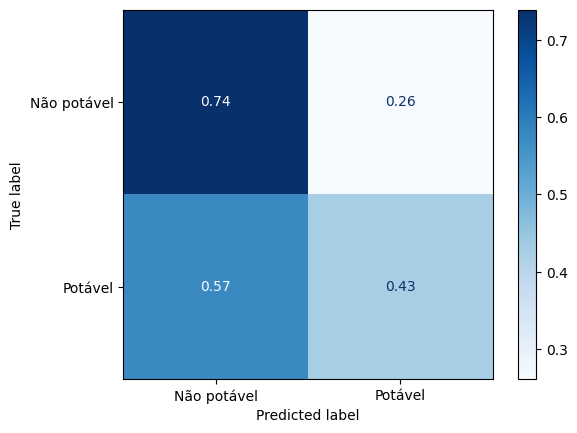

In [ ]:
ConfusionMatrixDisplay.from_estimator(xg_agua, X_test, y_test, display_labels=['Não potável', 'Potável'], normalize='true', cmap='Blues');

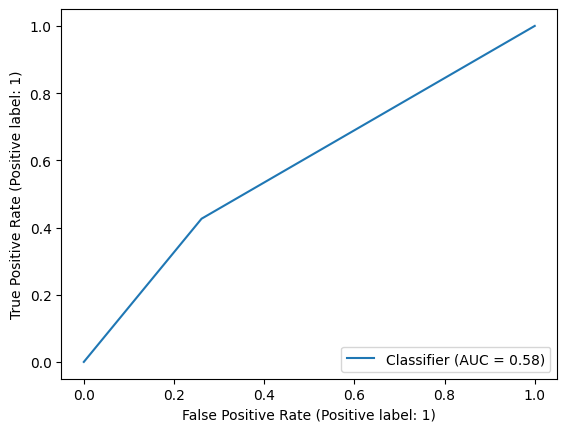

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred);

In [ ]:
dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
params = {'objective': 'binary:logistic'}

cv_resultados = xgb.cv(dtrain=dmatrix,
                       params=params,
                       nfold=5,
                       num_boost_round=100,
                       early_stopping_rounds=5,
                       metrics='error',
                       as_pandas=True,
                       seed=123)

print(cv_resultados)
acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia}')

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.328072         0.020199         0.360545        0.040288
1          0.285681         0.018545         0.345123        0.026350
2          0.262805         0.018997         0.346125        0.034759
3          0.241672         0.013471         0.338164        0.026492
4          0.234088         0.014345         0.339157        0.022895
5          0.222278         0.015243         0.334188        0.027404
6          0.205993         0.014300         0.329709        0.024254
7          0.195177         0.011097         0.324239        0.030487
Acuracia: 0.6757613915533993


### gridsearchcv

In [ ]:
params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 10],
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [10, 25, 50],
}

xg_agua = xgb.XGBClassifier()

grid_search_cv = GridSearchCV(estimator=xg_agua,
                                      param_grid=params,
                                      cv=4,
                                      scoring='accuracy',
                                      verbose=1
)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_balanced, y_balanced = sm.fit_resample(X_train, y_train)

In [ ]:
grid_search_cv.fit(X_balanced, y_balanced)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 2, 4, 6, 10],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 0,
 'n_estimators': 50}

In [ ]:
grid_search_cv.best_score_

0.6738095238095237

In [ ]:
xg_agua = xgb.XGBClassifier(objective='binary:logistic',
                        colsample_bytree=1,
                        learning_rate=0.3,
                        max_depth=0,
                        n_estimators=50
)

xg_agua.fit(X_balanced, y_balanced)
y_pred = xg_agua.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6324503311258278

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       360
           1       0.54      0.55      0.55       244

    accuracy                           0.63       604
   macro avg       0.62      0.62      0.62       604
weighted avg       0.63      0.63      0.63       604



## pipeline

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('xgboost', xgb.XGBClassifier())])

xgb_param_grid = {
    'xgboost__learning_rate': [0.1, 0.2, 0.3],
    'xgboost__max_depth': [0, 2, 4, 6, 10],
    'xgboost__colsample_bytree': [0.1, 0.5, 1],
    'xgboost__n_estimators': [10, 25, 50]
}

grid_search_cv = GridSearchCV(estimator=pipeline, param_grid=xgb_param_grid,
                              scoring='recall', cv=4, verbose=1)

grid_search_cv.fit(X, y)

print('Acuracia:', grid_search_cv.best_score_)
print('Melhor estimador:', grid_search_cv.best_estimator_)

Fitting 4 folds for each of 135 candidates, totalling 540 fits
Acuracia: 0.3946861434911964
Melhor estimador: Pipeline(steps=[('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                    

In [ ]:
cross_val_scores = cross_val_score(pipeline, X, y, scoring='recall', cv=3)

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 357, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 241, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE()' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't
